# Examples for pyPlumbing

PyPlumbing is the new package which substitutes pySeifert. PyPlumbing offers numerous advantages with respect to pySeifert:
1. pyPlumbing is quicker than pySeifert
2. pyPlumbing is able to handle any weakly negative plumbing manifold

This note covers a few examples of pyPlumbing usage

In [9]:
load("pyPlumbing.sage")

## Definitions
Plumbings can be defined in multiple ways depending on the manifold.
The most generic is to define a Plumbing through a plumbing graph:

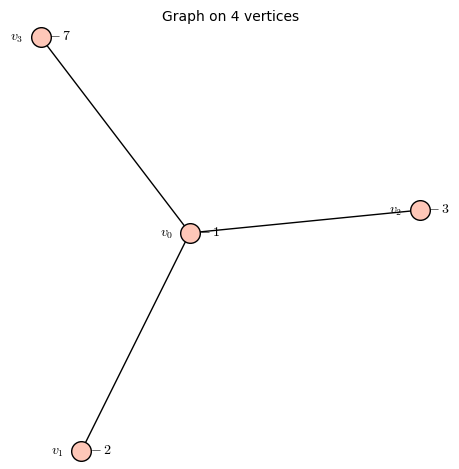

In [10]:
P = Plumbing({0: -1, 1: -2, 2: -3, 3: -7}, [(0, 1), (0, 2), (0, 3)]);P.graph

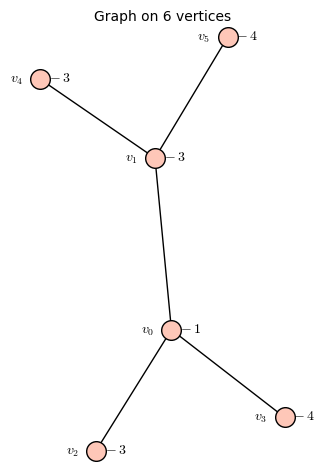

In [11]:
P2 = Plumbing({0: -1, 1: -3, 2: -3, 3: -4, 4: -3, 5: -4}, [(0,1),(0,2),(0,3),(1,4),(1,5)]); P2.graph

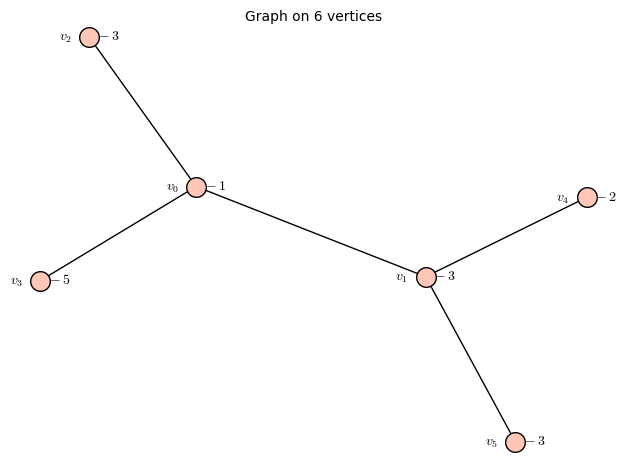

In [12]:
P3 = Plumbing({0: 1, 1:3, 2:3, 3:5, 4:2, 5:3}, [(0,1),(0,2),(0,3),(1,4),(1,5)]).invert_orientation(); P3.graph

Seifert manifolds may also be defined through their Seifert data

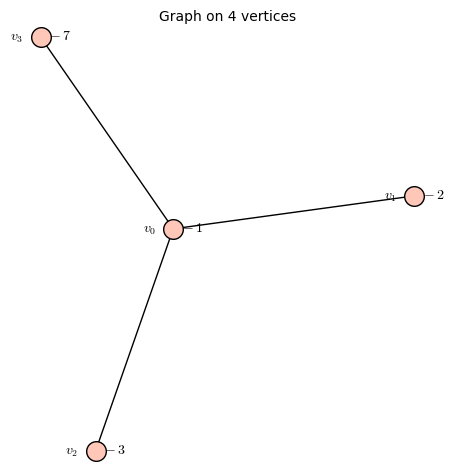

In [ ]:
P = Plumbing.from_Seifert_data([-1,1/2,1/3,1/7]);P.graph

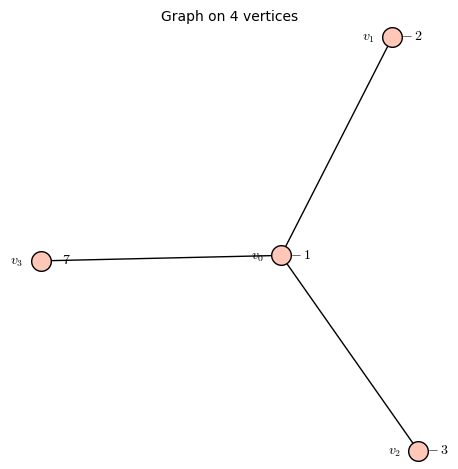

In [13]:
P4 = Plumbing.from_Seifert_data([-1,1/2,1/3,1/9]);P.graph

Spin c structures are computed in a similar way as pySeifert

In [14]:
P.spin_c(["A",1]),P.spin_c(["A",2]),P.spin_c(["A",5]),P.spin_c(["D",5])

([
[1]
[1]
[1]
[1]
],
 [
[1 1]
[1 1]
[1 1]
[1 1]
],
 [
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
],
 [
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
])

In [15]:
P4.spin_c(["A",1]),P4.spin_c(["A",2]),P4.spin_c(["A",5]),P4.spin_c(["D",5])

([
[1]  [1]
[1]  [1]
[1]  [1]
[1], [3]
],
 [
[1 1]  [1 1]
[1 1]  [1 1]
[1 1]  [1 1]
[1 1], [3 0]
],
 [
[1 1 1 1 1]  [1 1 1 1 1]
[1 1 1 1 1]  [1 1 1 1 1]
[1 1 1 1 1]  [1 1 1 1 1]
[1 1 1 1 1], [3 0 1 1 1]
],
 [
[1 1 1 1 1]  [1 1 1 1 1]
[1 1 1 1 1]  [1 1 1 1 1]
[1 1 1 1 1]  [1 1 1 1 1]
[1 1 1 1 1], [3 0 1 1 1]
])

And with these the $\hat{Z}$ can be computed (the higher the last number the more q-powers are computed. It's still unclear to what maximum q-power the expansion is correct though. The best thing to do in that case so far is to compute the next number and see where they start differing.)

There are two functions to compute zhat. Plumbing.zhat uses for loops and lists in python, zhat_vec uses numpy vectorization. The first is more tested than the second. Both are quicker than pySeifert, pySeifert is more reliable.

In [17]:
import time
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],5, method = "python") 
end = time.time()
print(end-st)
print(zh)

0.06900167465209961
q^(1/2)(-2 + 2q^(1) + 2q^(5) + O(q^6))


In [19]:
import time
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],5, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

0.05049920082092285
q^(1/2)(-2 + 2q^(1) + 2q^(5) + O(q^6))


In [81]:
import time
st = time.time()
zh = P.zhat_vec(["A",1],P.spin_c(["A",1])[0],5) 
end = time.time()
print(end-st)
print(zh)

0.026786088943481445
q^(1/2)(-2 + 2q^(1) + 2q^(5) + O(q^6))


In [82]:
import time
PS = Seifert([-1,1,2,1,3,1,7])
st = time.time()
zh = PS.z_hat(["A",1],PS.boundary_conditions(["A",1],basis="weight")[0],1050)
end = time.time()
print(end-st)
print(zh)

0.12628555297851562
2*q^(2091/2) - 2*q^(1973/2) - 2*q^(1821/2) + 2*q^(1711/2) - 2*q^(1693/2) + 2*q^(1587/2) + 2*q^(1451/2) - 2*q^(1353/2) + 2*q^(1337/2) - 2*q^(1243/2) - 2*q^(1123/2) + 2*q^(1037/2) - 2*q^(1023/2) + 2*q^(941/2) + 2*q^(837/2) - 2*q^(763/2) + 2*q^(751/2) - 2*q^(681/2) - 2*q^(593/2) + 2*q^(531/2) - 2*q^(521/2) + 2*q^(463/2) + 2*q^(391/2) - 2*q^(341/2) + 2*q^(333/2) - 2*q^(287/2) - 2*q^(231/2) + 2*q^(193/2) - 2*q^(187/2) + 2*q^(153/2) + 2*q^(113/2) - 2*q^(87/2) + 2*q^(83/2) - 2*q^(61/2) - 2*q^(37/2) + 2*q^(23/2) - 2*q^(21/2) + 2*q^(11/2) + 2*q^(3/2) - 2*sqrt(q)


In [83]:
import time
st = time.time()
zh = P2.zhat(["A",1],P2.spin_c(["A",1])[0],5) 
end = time.time()
print(end-st)
print(zh)

1.2997798919677734
q^(1/2)(4 + 4q^(1) - 4q^(2) - 4q^(4) - 8q^(5) + 4q^(6) - 4q^(7) - 4q^(8) + 4q^(10) + 4q^(11) + O(q^12))


In [84]:
import time
st = time.time()
zh = P2.zhat_vec(["A",1],P2.spin_c(["A",1])[0],5) 
end = time.time()
print(end-st)
print(zh)

0.3264741897583008
q^(1/2)(4 + 4q^(1) - 4q^(2) - 4q^(4) - 8q^(5) + O(q^6))


In [85]:
import time
st = time.time()
zh = P3.zhat(["A",1],P3.spin_c(["A",1])[0],5) 
end = time.time()
print(end-st)
print(zh)

1.3812212944030762
q^(1/2)(6 + 6q^(1) - 2q^(2) + 4q^(3) + 2q^(4) - 4q^(6) - 8q^(7) + 4q^(8) - 4q^(9) - 4q^(10) + O(q^11))


In [86]:
import time
st = time.time()
zh = P3.zhat_vec(["A",1],P3.spin_c(["A",1])[0],50) 
end = time.time()
print(end-st)
print(zh)

4.849611043930054
q^(1/2)(6 + 6q^(1) - 2q^(2) + 4q^(3) + 2q^(4) - 4q^(6) - 8q^(7) + 4q^(8) - 4q^(9) - 4q^(10) + O(q^11))


In [151]:
P3.zhat_vec(["A",1],P3.spin_c(["A",1])[0],50,L_norm=L_norm_vectorized) 

q^(1/2)(6 + 6q^(1) - 2q^(2) + 4q^(3) + 2q^(4) - 4q^(6) - 8q^(7) + 4q^(8) - 4q^(9) - 4q^(10) + O(q^11))

In [152]:
P3.zhat_vec(["A",1],P3.spin_c(["A",1])[0],50,L_norm=L_norm_vectorized_2) 

q^(1/2)(6 + 6q^(1) - 2q^(2) + 4q^(3) + 2q^(4) - 4q^(6) - 8q^(7) + 4q^(8) - 4q^(9) - 4q^(10) + O(q^11))

In [154]:
P3.zhat_vec(["A",1],P3.spin_c(["A",1])[0],50,L_norm=L_norm_vectorized_3)

q^(1/2)(6 + 6q^(1) - 2q^(2) + 4q^(3) + 2q^(4) - 4q^(6) - 8q^(7) + 4q^(8) - 4q^(9) - 4q^(10) + O(q^11))

In [200]:
load("pyPlumbing.sage")
P3 = Plumbing({0: 1, 1:3, 2:3, 3:5, 4:2, 5:3}, [(0,1),(0,2),(0,3),(1,4),(1,5)]).invert_orientation(); P3.graph
P3.zhat_vec(["A",1],P3.spin_c(["A",1])[0],50,L_norm=L_norm_vectorized_4)

q^(1/2)(6 + 6q^(1) - 2q^(2) + 4q^(3) + 2q^(4) - 4q^(6) - 8q^(7) + 4q^(8) - 4q^(9) - 4q^(10) + O(q^11))

In [216]:
load("pyPlumbing.sage")
!export NUMBA_DEBUG=1
P3 = Plumbing({0: 1, 1:3, 2:3, 3:5, 4:2, 5:3}, [(0,1),(0,2),(0,3),(1,4),(1,5)]).invert_orientation(); P3.graph
P3.zhat_vec(["A",1],P3.spin_c(["A",1])[0],50,L_norm=L_norm_vectorized_5)

Test
Test
Test


q^(1/2)(6 + 6q^(1) - 2q^(2) + 4q^(3) + 2q^(4) - 4q^(6) - 8q^(7) + 4q^(8) - 4q^(9) - 4q^(10) + O(q^11))

In [165]:
type(len([1,2,3]))

<class 'int'>

All functions work for non-brieskorn spheres

In [43]:
import time
st = time.time()
zh = P4.zhat(["A",1],P4.spin_c(["A",1])[0],8) 
end = time.time()
print(end-st)
print(zh)

0.20391464233398438
q^(1)(-2 - 2q^(4) + 2q^(5) + 2q^(17) - 2q^(19) - 2q^(39) + 2q^(42) + 2q^(70) - 2q^(74) - 2q^(110) + O(q^115))


In [44]:
import time
st = time.time()
zh = P4.zhat_vec(["A",1],P4.spin_c(["A",1])[0],8) 
end = time.time()
print(end-st)
print(zh)

0.03383970260620117
q^(1)(-2 - 2q^(4) + 2q^(5) + O(q^6))


In [45]:
import time
PS4 = Seifert([-1,1,2,1,3,1,9])
st = time.time()
zh = PS4.z_hat(["A",1],PS4.boundary_conditions(["A",1],basis="weight")[0],1150)
end = time.time()
print(end-st)
print(zh)

0.2782297134399414
2*q^1145 + 2*q^1021 - 2*q^1006 - 2*q^890 + 2*q^876 + 2*q^768 - 2*q^755 - 2*q^655 + 2*q^643 + 2*q^551 - 2*q^540 - 2*q^456 + 2*q^446 + 2*q^370 - 2*q^361 - 2*q^293 + 2*q^285 + 2*q^225 - 2*q^218 - 2*q^166 + 2*q^160 + 2*q^116 - 2*q^111 - 2*q^75 + 2*q^71 + 2*q^43 - 2*q^40 - 2*q^20 + 2*q^18 + 2*q^6 - 2*q^5 - 2*q


With Plumbing.zhat_vec we can also compute zhat at higher rank with multiple nodes. Albeit the rank is never greater than 2 otherwise my computer crashes

In [52]:
load("pyPlumbing.sage")
P2 = Plumbing({0: -1, 1: -3, 2: -3, 3: -4, 4: -3, 5: -4}, [(0,1),(0,2),(0,3),(1,4),(1,5)])
import time
st = time.time()
zh = P2.zhat_vec(["A",2],P2.spin_c(["A",2])[0],2) 
end = time.time()
print(end-st)
print(zh)

27.27283215522766
q^(2)(16 + O(q^1))


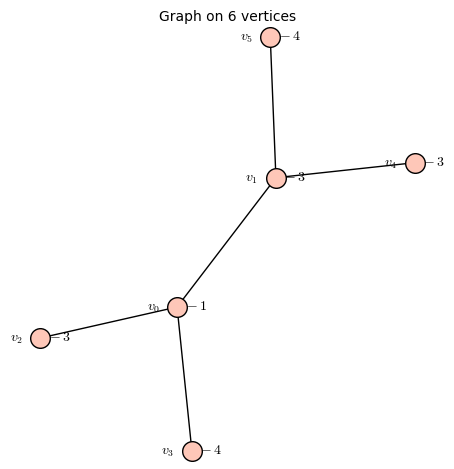

In [58]:
P2.graph

In [72]:
P._vertices_dict

{0: -1, 1: -2, 2: -3, 3: -7}

In [88]:
load("pyPlumbing.sage")
W = WeightedGraph({0: (0,0), 1: (0,0), 2: (0,0), 3: (2,2)},P._edges)
for row in W.weight_vector.T.rows():
    print(np.all(np.array(vector(row))==0))

True
True
True
False


In [86]:
([0,0])

[0, 0]

In [84]:
WG = [g.T for g in weyl_group(["A",1])]
for g1,g2 in itertools.product(WG,repeat=2):
    print(g1,g2,g1*g2) 

[1] [1] [1]
[1] [-1] [-1]
[-1] [1] [-1]
[-1] [-1] [1]


In [ ]:
def zhat_wil(self, type_rank, spin_c, wilson_mask, n_powers = 2, basis="weight"):
        if basis == "root":
            raise NotImplementedError("Root basis not implemented yet")
        # Ensure that the unweighted graph from wilson mask is the same as that of self
        if not self.graph.is_isomorphic(wilson_mask.graph):
            raise ValueError("The unweighted plumbing graphs are not isomorphic")
            
        # Collect data for the weyl group
        WG = [g.T for g in weyl_group(type_rank)]
        rho = cartan_matrix(type_rank) * weyl_vector(type_rank)
        
        
        # Set up the q-power contributions for leaves if leaves exist
        if 1 in list(self.degree_vector.T)[0]:
            leaf_pref = [det(g)        for g in WG]
        
        # Compute the weyl denominator expansion, if high degree nodes exists 
        if any([x > 2 for x in self.degree_vector.T[0]]):
            weyl_expansion = weyl_double_sided_expansion(type_rank, n_powers)
        
        # Compute the node contributions
        node_contributions_exponents = list()
        node_contributions_prefactors = list()
        
        for degree,wilson_rep in zip(self.degree_vector.T[0],wilson_mask.degree_vector.T.rows()):
            wilson_rep = vector(wilson_rep)
            if degree == 0: # If the degree is zero, the contribution is just one
                node_contributions_exponents.append([list(g * rho + g2 * (rho + wilson_rep)) for g,g2 in itertools.product(WG,repeat=2)])
                node_contributions_prefactors.append([det(g*g2) for g in WG])

            elif degree == 1: # If the degree is one we have a leaf
                node_contributions_exponents.append([list(g * (rho + wilson_rep)) for g in WG])
                node_contributions_prefactors.append([det(g)        for g in WG])
            elif degree == 2:
                if np.all(np.array(wilson_rep)==0):
                    node_contributions_exponents.append([list(g * (wilson_rep)) for g in WG])
                    node_contributions_prefactors.append([det(g)        for g in WG])
            else: #If the degree is greater than one, use 
                new_powrs = list()
                new_coeffs = list()
                for expansion in weyl_expansion:
                    tot_exp = invert_powers(expansion.pow(degree-2))
                    powrs,coeffs = list(zip(*tot_exp.numerical))
                    new_powrs += powrs
                    new_coeffs += coeffs
                node_contributions_exponents.append(new_powrs)
                node_contributions_prefactors.append(new_coeffs)
        # Iterate over cartesian products
        zhat = list()
        make_products = lambda x: itertools.product(*x)
        for coeffs, ell in zip(*list(map(make_products,[node_contributions_prefactors,node_contributions_exponents]))):
            if matrix(self.plumbing_matrix_inverse * (matrix(ell)-matrix(spin_c))) in MatrixSpace(ZZ,self.vertex_count,type_rank[1]):
                zhat += [[[(-1/2*self.L_norm(type_rank,ell))],product(coeffs)]]
        return Series(zhat,variables=[q]) *self._zhat_prefactor(type_rank)

In [106]:
import tempfile
import os

# Assuming func contains the code as a string
func = """
def go_fast():
    print("Going fast!")

go_fast()
"""

# Create a temporary file
with tempfile.NamedTemporaryFile(delete=False, suffix='.py') as temp_file:
    temp_file_name = temp_file.name
    temp_file.write(func.encode('utf-8'))

# Run the temporary file
os.system(f'python {temp_file_name}')

# Clean up the temporary file
os.remove(temp_file_name)

Going fast!


In [103]:
func

"\nfrom numba import jit \nimport numpy as np \nimport time\n\nx = np.arange(100,dtype='float64').reshape(10, 10)\n\n@jit(nopython=True) \ndef go_fast(a): # Function is compiled and runs in machine code\n    trace = 0\n    for i in range(a.shape[0]):\n        trace += np.tanh(a[i, i])\n    return a + trace\n"

In [109]:
# Assuming func contains the code as a string
func = """
def go_fast():
    return "Going fast!",[1,2,3]

# Store the result of the function call in a variable
result = go_fast()
"""

# Create a dictionary to serve as the local namespace for exec
local_namespace = {}

# Execute the code in func
exec(func, {}, local_namespace)

# Retrieve the result from the local namespace
result = local_namespace['result']

# Print the result
print(result)  # Output: Going fast!

('Going fast!', [1, 2, 3])


In [110]:
result[1]

[1, 2, 3]

In [111]:
# Assuming func contains the code as a string
func = """
import numpy as np
from numba import jit
import sys

def go_fast(a):  # Function is compiled and runs in machine code
    trace = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            trace += np.tanh(a[i, j]) * np.tanh(a[j, i])

    trace = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            trace += np.tanh(a[i, j]) * np.tanh(a[j, i])
            
    return a + trace

if __name__ == '__main__':
    
    
"""

# Create a dictionary to serve as the local namespace for exec
local_namespace = {}

# Execute the code in func
exec(func, {}, local_namespace)

# Retrieve the result from the local namespace
result = local_namespace['result']

# Print the result
print(result)  # Output: Going very fast!

Going very fast!


In [129]:
import numpy as np

# Assuming func contains the code as a string
func = """
import numpy as np
from numba import jit

#@jit(nopython=True)
def go_fast(a):  # Function is compiled and runs in machine code
    trace = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            trace += np.tanh(a[i, j]) * np.tanh(a[j, i])

    trace = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            trace += np.tanh(a[i, j]) * np.tanh(a[j, i])
            
    return a + trace

# Get x from the local namespace
x = locals().get('x', np.arange(100, dtype='float64').reshape(10, 10))  # Default value if 'x' is not provided

result = go_fast(x)
"""

# Create a dictionary to serve as the local namespace for exec
local_namespace = {}

# Define the object you want to pass
x = np.random.rand(10, 10)

# Add the object to the local namespace
local_namespace['x'] = x
local_namespace['np'] = np

# Execute the code in func
exec(func, {}, local_namespace)

# Retrieve the result from the local namespace
result = local_namespace['result']

# Print the result
print(result)

NameError: name 'np' is not defined

In [134]:
import numpy as np

# Assuming func contains the code as a string
func = """
import numpy as np
from numba import jit

#@jit(nopython=True)
def go_fast(a):  # Function is compiled and runs in machine code
    trace = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            trace += np.tanh(a[i, j]) * np.tanh(a[j, i])

    trace = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            trace += np.tanh(a[i, j]) * np.tanh(a[j, i])
            
    return a + trace

# Get x from the local namespace
x = locals().get('x', np.arange(100, dtype='float64').reshape(10, 10))  # Default value if 'x' is not provided

result = go_fast(x)
"""

# Create a dictionary to serve as the local namespace for exec
local_namespace = {}

# Define the object you want to pass
x = np.random.rand(1000, 1000)

# Add the object to the local namespace
local_namespace['x'] = x

# Execute the code in func with 'np' also passed to the global namespace
exec(func, {'np': np}, local_namespace)

# Retrieve the result from the local namespace
result = local_namespace['result']

# Print the result
print(result)

[[187891.76831322 187892.19658168 187892.2016095  ... 187891.50800368
  187891.81717634 187891.95297978]
 [187891.77899944 187891.75900721 187891.87579241 ... 187892.20727079
  187891.7050395  187891.70837909]
 [187891.97160053 187892.2097166  187891.2528852  ... 187891.33885511
  187891.75779425 187892.24968444]
 ...
 [187891.87252319 187891.3325332  187891.43412075 ... 187892.21595389
  187892.09291126 187892.14008956]
 [187891.35248492 187892.1432808  187891.54787167 ... 187891.98329056
  187892.0863291  187892.12709505]
 [187891.68780514 187891.51563361 187892.11684386 ... 187891.59800374
  187892.19250344 187891.30962191]]


In [138]:
import numpy as np
def jitted_go_fast(x):
    # Assuming func contains the code as a string
    func = """
import numpy as np
from numba import jit

@jit(nopython=True)
def go_fast(a):  # Function is compiled and runs in machine code
    trace = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            trace += np.tanh(a[i, j]) * np.tanh(a[j, i])

    trace = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            trace += np.tanh(a[i, j]) * np.tanh(a[j, i])
            
    return a + trace

# Get x from the local namespace
x = locals().get('x', np.arange(100, dtype='float64').reshape(10, 10))  # Default value if 'x' is not provided

result = go_fast(x)
    """

    # Create a dictionary to serve as the local namespace for exec
    local_namespace = {}

    # Add the object to the local namespace
    local_namespace['x'] = x

    # Execute the code in func with 'np' also passed to the global namespace
    exec(func, {'np': np}, local_namespace)

    # Retrieve the result from the local namespace
    result = local_namespace['result']

    # return the result
    return result

In [142]:
x = np.random.rand(1000, 1000)
%timeit jitted_go_fast(x)

145 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [140]:
def go_fast(a):  # Function is compiled and runs in machine code
    trace = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            trace += np.tanh(a[i, j]) * np.tanh(a[j, i])

    trace = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            trace += np.tanh(a[i, j]) * np.tanh(a[j, i])
            
    return a + trace

In [143]:
x = np.random.rand(1000, 1000)
%timeit go_fast(x)

1.93 s ± 64.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
